# Covariance

Be sure to import Symbulate using the following commands.

In [2]:
from symbulate import *
%matplotlib inline

<a id='joint'></a>

The **covariance** between random variables $X$ and $Y$, defined as
$$
Cov(X,Y) = E[(X-E(X))(Y-E(Y))],
$$
measures the degree of linear dependence between $X$ and $Y$.  Covariance can be approximated by simulating many pairs of values of the random variables and using `.cov()`.

Here we roll 2 die and calculate the covariance.

In [17]:
die = list(range(1, 6+1, 1)) # this is just a list of the number 1 through 6
roll1, roll2 = RV(BoxModel(die, size = 1)*BoxModel(die, size = 1))
rollpairs = (roll1 & roll2).sim(10000)
rollpairs.cov()

0.0029956799999999385

Note that because these rolls are assumed to be independent, we expect this value to be close to zero.

Here we draw from the uniform distribution on 0 to 1 and calculate the covariance between the min and max for each draw. Note that the true covariance should be 1/36.

(0.02754215177953957, 0.027777777777777776)

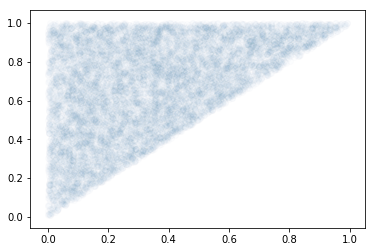

In [10]:
P = Uniform(a=0, b=1) ** 2
X = RV(P, min)
Y = RV(P, max)
xy = (X & Y).sim(10000)
plot(xy, alpha = 0.01)
xy.cov(), 1/36

*Example.* A multivariate normal example (distribution discussed later).

In [22]:
covmatrix = [[1, -0.5],
             [-0.5, 4]]
X, Y = RV(MultivariateNormal(mean=[0, 1], cov=covmatrix)) # see below for notes on "unpacking"
xy = (X & Y).sim(10000)
xy.cov()

-0.507678298407696

When simulating more than two random variables, applying `.cov()` returns the **covariance matrix** of covariances between each pair of values (with the variances on the diagonal).

In [23]:
(X & Y & X+Y).sim(10000).cov()

array([[ 0.99574916, -0.52471274,  0.47103642],
       [-0.52471274,  3.97175643,  3.44704369],
       [ 0.47103642,  3.44704369,  3.91808011]])

<a id='corr'></a>